# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [399]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

In [427]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

Загрузим данные из датасета MNIST

In [364]:
mnist = fetch_openml("mnist_784")

Используем подмножество digits для ускорения расчетов

In [365]:
digits = datasets.load_digits()

Преобразуем данные из матричного в векторный вид

In [428]:
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

Разделим данные на тренировочную и тестовую выборки

In [429]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Создаем функцию, рассчитывающую точность предсказания при определенном значении k

In [430]:
def accuracy_score_value(k_values):
    test_scores = []
    train_scores = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
        model.fit(X_train, y_train)
        # для тренировочной выборки
        y_train_pred = model.predict(X_train)
        train_score = accuracy_score(y_train, y_train_pred)*100
        train_scores.append(train_score)
        # для тестовой выборки
        y_test_pred = model.predict(X_test)
        test_score = accuracy_score(y_test, y_test_pred)*100
        test_scores.append(test_score)
    return train_scores, test_scores

Рассчитываем значения отдельно для тренировочной и тестовой выборок

In [431]:
k_values = np.arange(1, 21)
train_scores, test_scores = accuracy_score_value(k_values)

Строим график

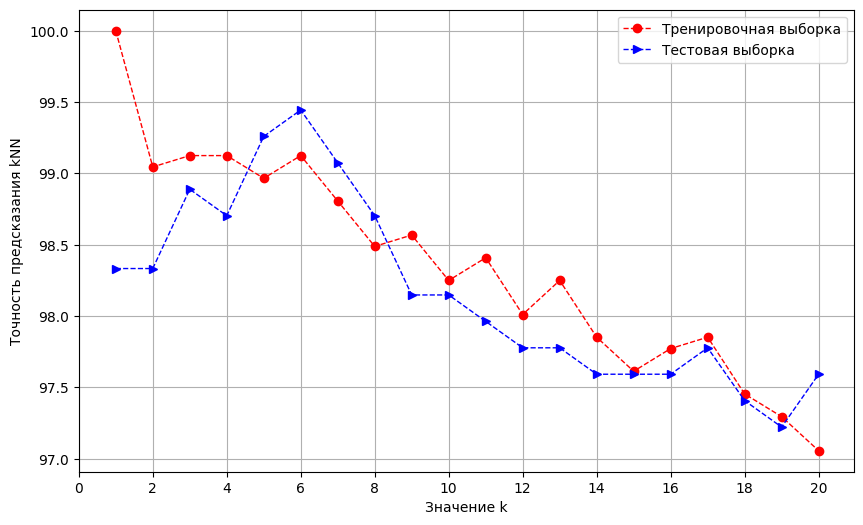

In [432]:
plt.figure(figsize=(10,6))
plt.plot(k_values, train_scores, 'r--', label = 'Тренировочная выборка', linewidth = 1, marker = 'o')
plt.plot(k_values, test_scores, 'b--', label = 'Тестовая выборка', linewidth = 1, marker = '>')
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(97, 100.5, 0.5))
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.legend()
plt.grid()
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:** Ответ понятен, если посмотреть на формулу метрики качества (из лекции). При k = 1 при вычислении метрики мы берем только сам объект и сравниваем с собой (то есть сравниваем его истинный и предсказанный классы) 

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

Аналогично предыдущему заданию создаем функцию, рассчитывающую точность kNN при определенном значении k, но с использованием манхэттенской метрики.

In [433]:
def accuracy_score_value_manhattan(k_values):
    test_scores = []
    train_scores = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, metric='manhattan', algorithm="brute")
        model.fit(X_train, y_train)
        # для тренировочной выборки
        y_train_pred = model.predict(X_train)
        train_score = accuracy_score(y_train, y_train_pred)*100
        train_scores.append(train_score)
        # для тестовой выборки
        y_test_pred = model.predict(X_test)
        test_score = accuracy_score(y_test, y_test_pred)*100
        test_scores.append(test_score)
    return train_scores, test_scores

Рассчитываем значения для тренировочной и тестовой выборок.

In [434]:
k_values = np.arange(1, 21)
train_scores_manhattan, test_scores_manhattan = accuracy_score_value_manhattan(k_values)

Строим график

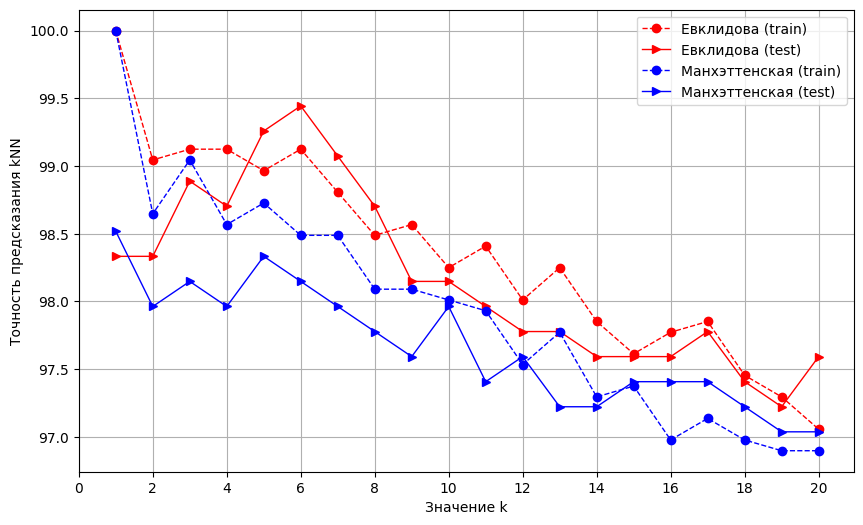

In [435]:
plt.figure(figsize=(10,6))
plt.plot(k_values, train_scores, 'r--', linewidth = 1, marker = 'o')
plt.plot(k_values, test_scores, 'r-', linewidth = 1, marker = '>')
plt.plot(k_values, train_scores_manhattan, 'b--', linewidth = 1, marker = 'o')
plt.plot(k_values, test_scores_manhattan, 'b-', linewidth = 1, marker = '>')
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.xticks(np.arange(0, 21, 2))
legend_elements = [
    plt.Line2D([0], [0], color='red', linestyle='--', lw=1, marker='o', label='Евклидова (train)'),
    plt.Line2D([0], [0], color='red', linestyle='-', lw=1, marker='>', label='Евклидова (test)'),
    plt.Line2D([0], [0], color='blue', linestyle='--', lw=1, marker='o', label='Манхэттенская (train)'),
    plt.Line2D([0], [0], color='blue', linestyle='-', lw=1, marker='>', label='Манхэттенская (test)')
]
plt.legend(handles=legend_elements)
plt.grid()
plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** Вообще говоря, манхэттенская метрика должна быть менее чувствительна к выбросам, так как изменение одного параметра не так сильно влияет на итог, как в евклидовой (это следует из определения этих метрик), однако видимо в нашем случае выбросов не так много. 
Исходя из графикоа, точность ухудшается. Возможно это произошло из-за того, что данные имеют несколько параметров, каждый из которых "весит" по-разному (то есть неотнормированы правильно), либо из-за того, что данные очень плотно расположены друг к другу и манхэттенская метрика хуже реагирует на различия, а следовательно это отрицательно влияет на точность.

**Выводы:** Эксперимент показал, что точность предсказания зависит от выборки, а также продемонстрировал так называемое переобучение (при k = 1). Это демонстрирует важность тестовой выборки, которая более точно показывает реальную предсказательную способность модели.

Более того, было выявлено, что качество предсказания зависит и от количества рассматриваемых соседей (оптимальное значение k = 6 для евклидовой метрики), и от выбранной метрики расстояния (в данном случае евклидова показывает лучшие результаты).

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [436]:
titanic = pd.read_csv("train.csv").dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [437]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

Подсчитаем количество строк с хотя бы одним пропуском.

In [438]:
print(titanic.isnull().any(axis=1).sum())

0


Их количество равно нулю, так как изначально при загрузке датасета был использован метод dropna(), который удалил все неподходящие строки.

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

Разделим данные на тестовую и тренировочную выборки.

In [439]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=random_state
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

Создадим отдельные датасеты с тренировочными и тестовыми данными для более удобной работы далее.

In [440]:
titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

Сначала произведем простой анализ по самому очевидному признаку - половой принадлежности. Построим график зависимости доли выживших от пола.

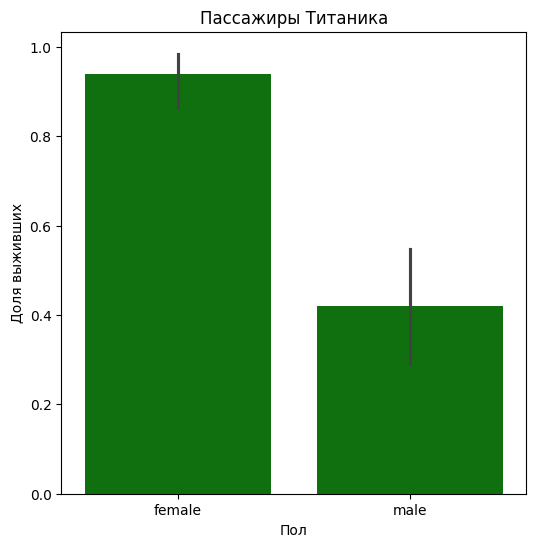

In [441]:
import seaborn as sns

plt.figure(figsize=(6,6))
sns.barplot(x = 'Sex', y ='Survived', data=titanic_train, color = 'green')
plt.xlabel('Пол')
plt.ylabel('Доля выживших')
plt.title('Пассажиры Титаника')
plt.show()

Теперь оценим зависимость выживаемости от возраста для представителей разных полов.

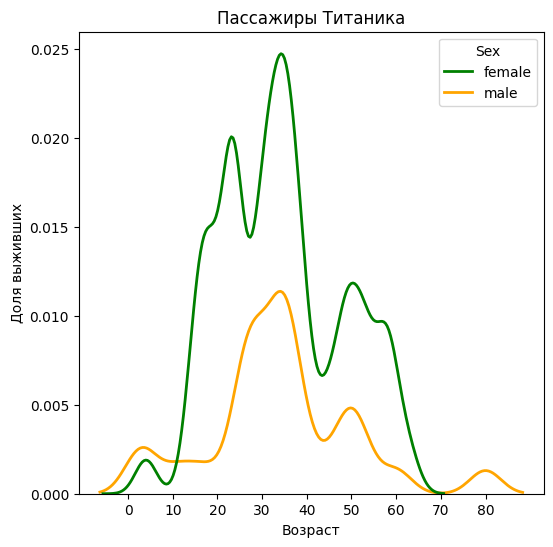

In [442]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=titanic_train, x='Age', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.xticks(np.arange(0, 90, 10))
plt.title('Пассажиры Титаника')
plt.show()

Посмотрим различия по этим же параметрам, но внутри одного классаа обслуживания. Сначала разделим данные на три подгруппы.

In [443]:
class1 = titanic_train[titanic_train['Pclass'] == 1]
class2 = titanic_train[titanic_train['Pclass'] == 2]
class3 = titanic_train[titanic_train['Pclass'] == 3]

Исследуем зависимость выживаемости от возраста и пола внутри этих трех подгрупп.

Первый класс:

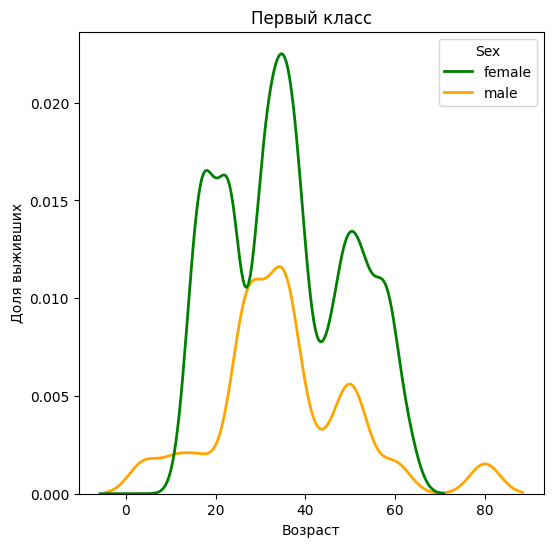

In [444]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class1, x='Age', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Первый класс')
plt.show()

Второй класс:

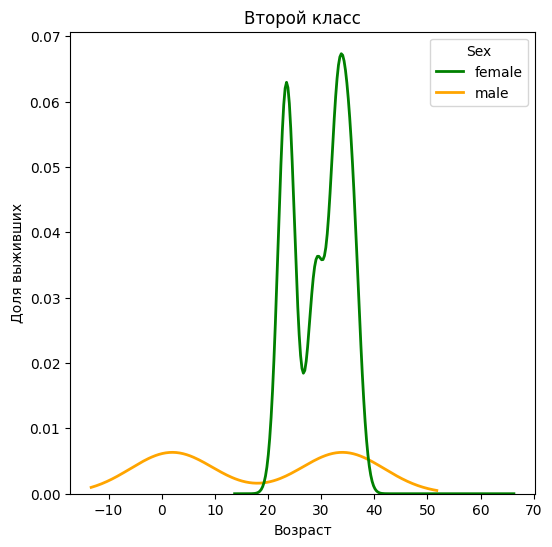

In [445]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class2, x='Age', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Второй класс')
plt.show()

Третий класс:

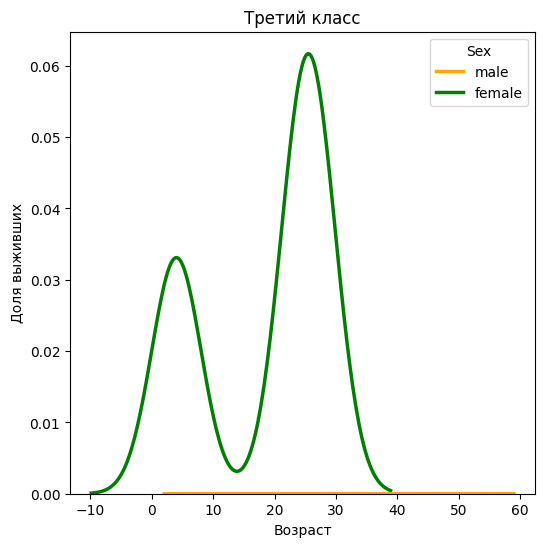

In [446]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class3, x='Age', hue='Sex', weights=class3['Survived'].replace({0: 0.001, 1: 1}), bw_adjust=0.4, linewidth=2.5, palette=['orange', 'green'])
plt.xlabel('Возраст')
plt.ylabel('Доля выживших')
plt.title('Третий класс')
plt.show()

Теперь рассмотрим, как влияет количество сиблингов или супругов на выживаемость.

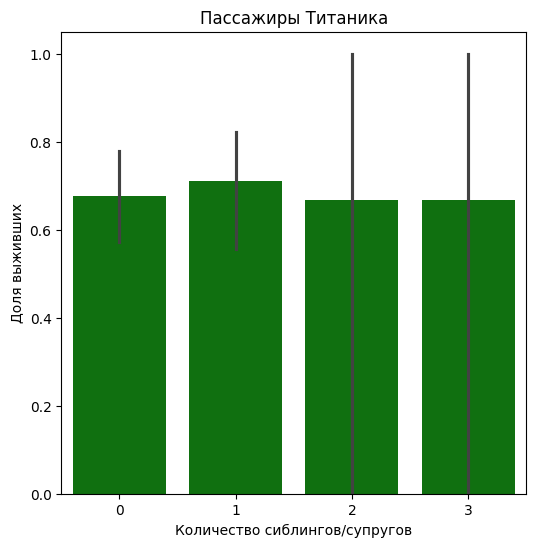

In [447]:
plt.figure(figsize=(6,6))
sns.barplot(data=titanic_train, x='SibSp', y = 'Survived', color = 'green')
plt.xlabel('Количество сиблингов/супругов')
plt.ylabel('Доля выживших')
plt.title('Пассажиры Титаника')
plt.show()

Также рассмотрим зависимость выживаемости от количества родителей/детей на борту.

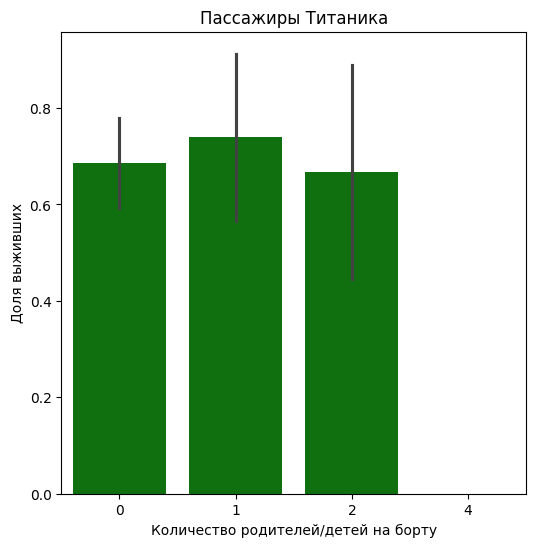

In [448]:
plt.figure(figsize=(6,6))
sns.barplot(data=titanic_train, x='Parch', y = 'Survived', color = 'green')
plt.xlabel('Количество родителей/детей на борту')
plt.ylabel('Доля выживших')
plt.title('Пассажиры Титаника')
plt.show()

Построим зависимость выживаемости от стоимости билета.

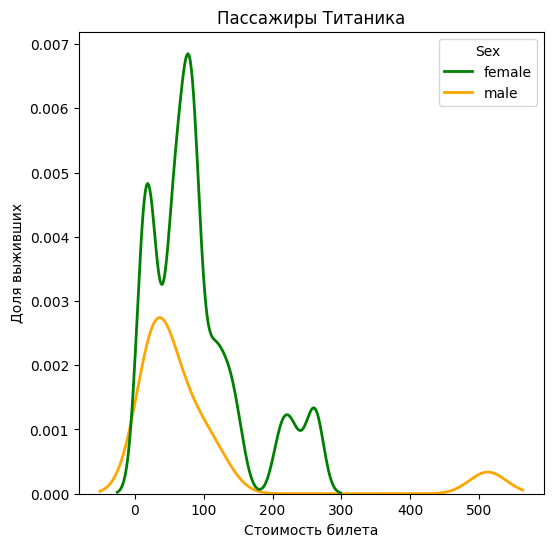

In [450]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=titanic_train, x='Fare', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Стоимость билета')
plt.ylabel('Доля выживших')
plt.title('Пассажиры Титаника')
plt.show()

А также посмотрим на эту зависимость внутри каждого из классов обслуживания.

Первый класс:

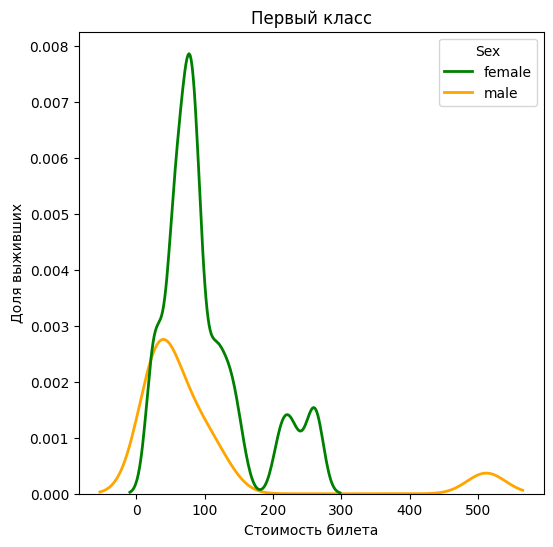

In [451]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class1, x='Fare', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Стоимость билета')
plt.ylabel('Доля выживших')
plt.title('Первый класс')
plt.show()

Второй класс:

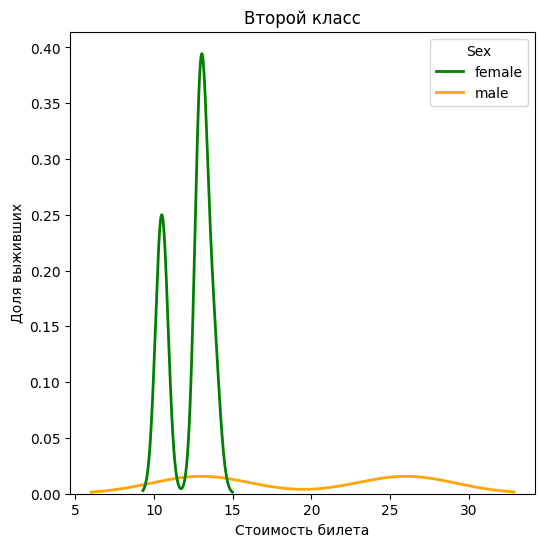

In [452]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class2, x='Fare', hue='Sex', weights='Survived', bw_adjust=0.4, linewidth=2, palette=['green', 'orange'])
plt.xlabel('Стоимость билета')
plt.ylabel('Доля выживших')
plt.title('Второй класс')
plt.show()

Третий класс:

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_9240\1217836029.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=class3, x='Fare', hue='Sex', weights=class3['Survived'].replace({0: 0.001, 1: 1}), bw_adjust=0.4, linewidth=2, palette=['orange', 'green'])


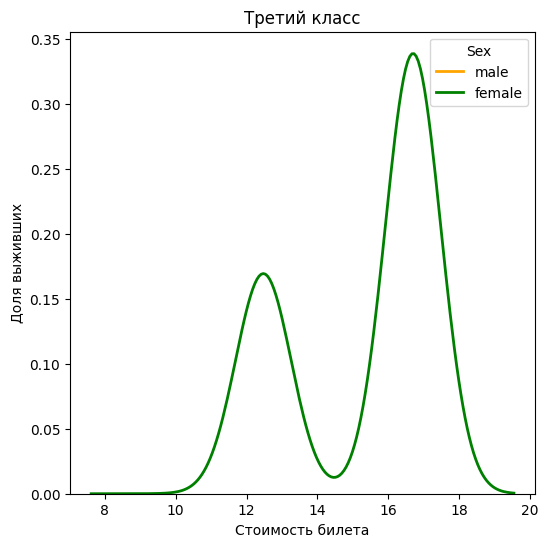

In [453]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=class3, x='Fare', hue='Sex', weights=class3['Survived'].replace({0: 0.001, 1: 1}), bw_adjust=0.4, linewidth=2, palette=['orange', 'green'])
plt.xlabel('Стоимость билета')
plt.ylabel('Доля выживших')
plt.title('Третий класс')
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

Сначала разделим данные на две части и соответственно выделим две ветки: мужской пол и женский.

Для женского пола: 
По графикам зависимости доли выживших от класса и возраста я увидела, что подавляющее большинство женщин всех возрастов из первого или третьего класса выжило, поэтому использую правило: если женщина из первого или третьего класса, то считаем, что она выжила. Если же она из второго класса, то исследуем дальше. Из графика зависимости доли выживших от возраста для второго класса видно, что доля выживших женщин возрастом до 40 лет высока, в то время как для женщин старше 40 она практически равна нулю. Отсюда следует правило: если женщина из второго класса и старше 40 лет, то считаем погибшей, иначе - выжившей.

Для мужского пола:
По графикам зависимости доли выживших от класса я увидела, что все мужчины из третьего класса и практически все из второго погибли, в то время как в первом классе доля выживших значительно выше. Поэтому использую правило: если  мужчина из первого класса, то считаем выжившим, иначе - погибшим.

**Визуализация дерева 1:**
```text

1. [Пол]
   ├── Женский (female)
   │   ├── [Класс]
   │   │   ├── 1 или 3 → Выжила ✅
   │   │   └── 2 класс
   │   │       ├── Возраст ≥40 → Погибла ❌
   │   │       └── Возраст <40 → Выжила ✅
   └── Мужской (male)
       ├── 1 класс → Выжил ✅
       └── 2 или 3 → Погиб ❌
```

**Дерево 2:**
По графику зависимости доли выживших от количества родителей/детей на борту я увидела, что все люди с их количеством >= 3 погибли. При этом большинство с меньшим числом выжило, поэтому использую правило: если у человек 3 и более ребенка/родителя на борту, то он погибает, иначе - выживает.

**Визуализация дерева 2:**
```text

1. [Parch (родители/дети)]
   ├── ≥ 3 → Погиб (0) ❌
   └── < 3 → Выжил (1) ✅

```

Реализуйте полученные деревья по шаблону

Реализуем дерево 1:

In [454]:
def tree1(features: pd.DataFrame) -> pd.Series:
    
    is_female = features['Sex'] == 'female'
    is_male = features['Sex'] == 'male'
    class1 = features['Pclass'] == 1
    class2 = features['Pclass'] == 2
    class3 = features['Pclass'] == 3
    age_leq_40 = features['Age'] <= 40
    
    female_survive = is_female & (
        class1 | class3 | (class2 & age_leq_40)
    )
    male_survive = is_male & class1
    
    predicted = pd.Series(0, index=features.index)
    predicted[female_survive] = 1
    predicted[male_survive] = 1
    
    return predicted

Реализуем дерево 2:

In [455]:
def tree2(features: pd.DataFrame) -> pd.Series:
    predicted = pd.Series(1, index=features.index)

    parch_mask = features['Parch'] >= 3
    predicted[parch_mask] = 0
    
    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

Опишем функцию, определяющую качество предсказания:

In [456]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    """
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    """

    correct_predictions = (target == predicted).sum()
    return 100*correct_predictions / len(target)


Проверка корректности на тестовой выборке для первого дерева (по полу и классу билета):

In [457]:
predictions_tree1 = tree1(titanic_test)
print(accuracy(y_test, predictions_tree1))

58.18181818181818


Проверка корректности на тестовой выборке для второго дерева (по количеству родителей/детей):

In [458]:
predictions_tree2 = tree2(titanic_test)
print(accuracy(y_test, predictions_tree2))

63.63636363636363


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** С одной стороны, SibSp и Parch принимают определенные дискретные значения (а kNN лучше работает на непрерывных или хотя бы обладающих бОльшим числом значений), а с другой число людей с разными значениями этих признаков может сильно отличаться. Вероятно, количество людей с 0 сиблингов больше, чем с 5, а значит при расчете доли выживших будут использованы несоразмерные массивы (те, у кого ноль, и те, у кого пять), и мы получим некорректные предсказания. Такая же проблема может быть с детьми/родителями.
Признак Pclass также принимает лишь три значения, но в каждом классе количество людей достаточно для того, чтобы делать корректные выводы.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




Сначала выделим в тренировочных и тестовых данных только те признаки, которые будем использовать.

In [459]:
selected_features = ['Pclass', 'Age', 'Sex', 'Fare']
X_train_selected = X_train[selected_features].dropna()
X_test_selected = X_test[selected_features].dropna()

Так как kNN работает только с числовыми данными, преобразуем столбец пола: женщины - 1, мужчины - 2.

In [460]:
X_train_selected['Sex'] = X_train_selected['Sex'].map({'female': 1, 'male': 2})
X_test_selected['Sex'] = X_test_selected['Sex'].map({'female': 1, 'male': 2})

Строим и обучаем модель на тренировочных данных

In [461]:
model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
model.fit(X_train_selected, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Теперь посмотрим на точность предсказаний:

In [462]:
y_pred = model.predict(X_test_selected)
score = accuracy_score(y_test, y_pred)
print(f"метрика accuracy = {score*100:.2f}%")

метрика accuracy = 65.45%


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [463]:
X_train_selected.describe().loc[['min', 'max']]

,Pclass,Age,Sex,Fare
min,1.0,2.0,1.0,0.0000
max,3.0,80.0,2.0,512.3292


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  В таком случае вклад каждого признака в модель разный, что плохо сказывается на корректности предсказания.


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Если минимальное или максимальное значение - порождение выброса, то "правильные" данные будут некорректно отмасштабированы.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [464]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.fit_transform(X_test_selected)

Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [465]:
stats = pd.DataFrame({
    'Признак': ['Pclass', 'Age', 'Sex', 'Fare'],
    'Min': np.min(X_train_scaled),
    'Max': np.max(X_train_scaled)
})
stats

,Признак,Min,Max
0,Pclass,0.0,1.0
1,Age,0.0,1.0
2,Sex,0.0,1.0
3,Fare,0.0,1.0


Обучите модель и сравните результат предсказаний со стандартизацией и без.

Строим и обучаем модель на тренировочных данных с учетом масштабирования:

In [466]:
model = KNeighborsClassifier(n_neighbors=5, algorithm="brute")
model.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Теперь смотрим на точность предсказаний:

In [467]:
y_pred = model.predict(X_test_scaled)
score = accuracy_score(y_test, y_pred)
print(f"метрика accuracy = {score*100:.2f}%")

метрика accuracy = 72.73%


**Вывод:** Эксперимент показал, что нормирование положительно сказывается на точности предсказаний, однако стоит исследовать другие способы (не только MinMaxScaler), так как и он обладает неточностями из-за влияния выбросов.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Аналогично функции из первого задания создаем функцию для отмасштабированных данных:

In [468]:
def accuracy_score_value_scaled(k_values):
    test_scores = []
    train_scores = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
        model.fit(X_train_scaled, y_train)
        # для тренировочной выборки
        y_train_pred = model.predict(X_train_scaled)
        train_score = accuracy_score(y_train, y_train_pred)*100
        train_scores.append(train_score)
        # для тестовой выборки
        y_test_pred = model.predict(X_test_scaled)
        test_score = accuracy_score(y_test, y_test_pred)*100
        test_scores.append(test_score)
    return train_scores, test_scores

Рассчитываем значения отдельно для тренировочной и тестовой выборок.

In [469]:
k_values = np.arange(1, 21)
train_scores, test_scores = accuracy_score_value_scaled(k_values)

Строим график зависимости точности предсказания от значения параметра k.

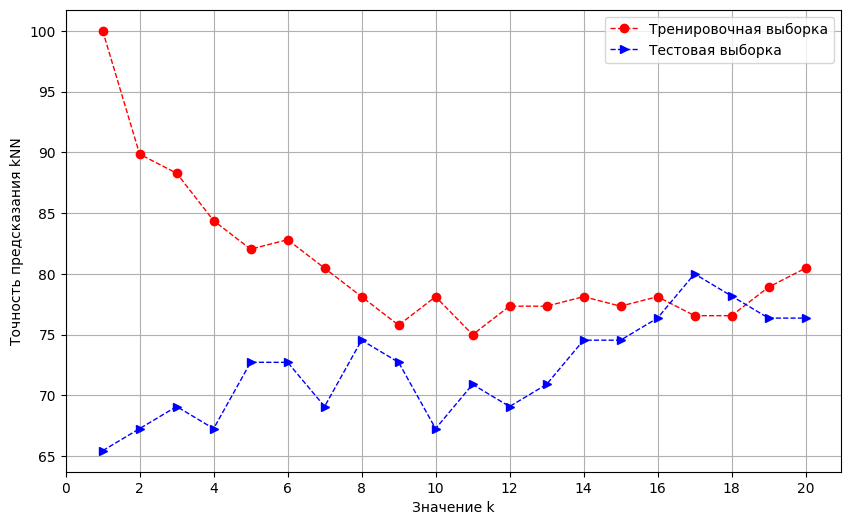

In [470]:
plt.figure(figsize=(10,6))
plt.plot(k_values, train_scores, 'r--', label = 'Тренировочная выборка', linewidth = 1, marker = 'o')
plt.plot(k_values, test_scores, 'b--', label = 'Тестовая выборка', linewidth = 1, marker = '>')
plt.xticks(np.arange(0, 21, 2))
plt.xlabel('Значение k')
plt.ylabel('Точность предсказания kNN')
plt.legend()
plt.grid()
plt.show()

**Вывод:**
1. Исследование показало, что даже не самый продвинутый метод ближайших соседей выигрывает в точности перед оценкой "на глаз", что приводит к более корректным предсказаниям.
2. Было выяснено, что одним из важных процессов при обучении является нормирование данных. Благодаря ему возможно избавиться от "перевеса" одних параметров над другими и повысить точность предсказаний.
3. Еще раз подтверждено, что для достижения максимальной точности в kNN нужно подбирать значение параметра k. В данном случае лучшая точность предсказания достигается при k = 17.